In [2]:
import numpy as np
from netCDF4 import Dataset
import glob
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

for file in list(glob.glob('*.nc')):
    fh = Dataset(file,'r')
    flag = fh.variables['SOL_AZIM'][:]
    lat = fh.variables['LAT_GIN'][:]
    lon = fh.variables['LON_GIN'][:]
    fh.variables.keys()
    fh.close()
    
#x,y = m(lat,lon)
    

C:\Users\Ben\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
C:\Users\Ben\Anaconda3\lib\site-packages\ipykernel\__main__.py:17: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.


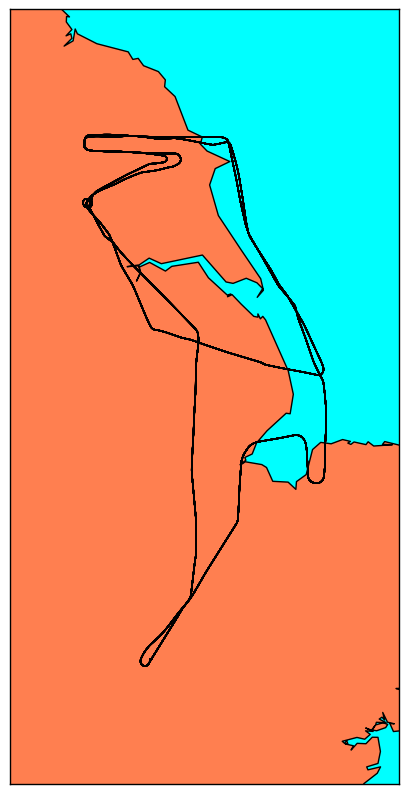

In [24]:
import numpy as np
from netCDF4 import Dataset
import glob
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import math
import mplleaflet
%matplotlib inline

fh = Dataset('core_faam_20160303_v004_r0_b947.nc','r')
lat = fh.variables['LAT_GIN'][:]

lat[lat==0]=-9999
lat[lat==-9999]=['nan']
lon = fh.variables['LON_GIN'][:]
lon[lon==0]=-9999
lon[lon==-9999]=['nan']
#mois = fh.variables['NV_LWC_U'][:]
max_lat = np.nanmax(lat)
min_lat = np.nanmin(lat) 
max_lon = np.nanmax(lon) 
min_lon = np.nanmin(lon)

max_lat = max_lat +0.5
min_lat = min_lat -0.5
max_lon = max_lon +0.5
min_lon = min_lon -0.5

#plt.plot(lon,lat)
#plt.xlabel('Longtitude')
#plt.xlabel('Latitude')
#plt.title('Flight Path: Skegness')
#print(max_lat)
#print(min_lat)
#print(max_lon)
#print(min_lon)

fig=plt.figure(figsize=(14, 10), dpi= 80, facecolor='w', edgecolor='k')
m = Basemap(llcrnrlon=min_lon,llcrnrlat=min_lat,urcrnrlon=max_lon,urcrnrlat=max_lat, resolution='i', projection='merc', lat_0 = 40., lon_0 = -80)
m.drawcoastlines()
m.drawmapboundary(fill_color='aqua') 
# fill continents, set lake color same as ocean color.
m.fillcontinents(color='coral',lake_color='aqua')
parallels = np.arange(0.,81,10.)

x,y = m(lon,lat)
m.plot(x,y,'k',label='Flight Path')

plt.show()

C:\Users\Ben\Anaconda3\lib\site-packages\ipykernel\__main__.py:15: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
C:\Users\Ben\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
C:\Users\Ben\Anaconda3\lib\site-packages\ipykernel\__main__.py:22: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.


0.0


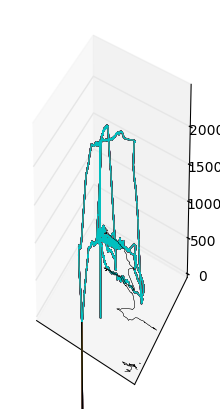

In [58]:
import numpy as np
from netCDF4 import Dataset
import glob
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import math
import mplleaflet
%matplotlib qt

fh = Dataset('core_faam_20160303_v004_r0_b947.nc','r')
lat = fh.variables['LAT_GIN'][:]

lat[lat==0]=-9999
lat[lat==-9999]=['nan']
lon = fh.variables['LON_GIN'][:]
lon[lon==0]=-9999
lon[lon==-9999]=['nan']
alt = fh.variables['HGT_RADR'][:]
alt = alt[:,1]
alt[alt==-9999]=['nan']
#mois = fh.variables['NV_LWC_U'][:]
max_lat = np.nanmax(lat)
min_lat = np.nanmin(lat) 
max_lon = np.nanmax(lon) 
min_lon = np.nanmin(lon)

max_lat = max_lat +0.5
min_lat = min_lat -0.5
max_lon = max_lon +0.5
min_lon = min_lon -0.5
max_alt =(np.nanmax(alt))
print(np.nanmin(alt))
fig = plt.figure()
ax = Axes3D(fig)
#ax = fig.gca(projection='3d')

#ax.azim = 270
#ax.elev = 45
#ax.dist = 10

m = Basemap(llcrnrlon=min_lon,llcrnrlat=min_lat,urcrnrlon=max_lon,urcrnrlat=max_lat, resolution='i', projection='merc', lat_0 = 40., lon_0 = -80)
x,y = m(lon,lat)
ax.add_collection3d(m.drawcoastlines(linewidth=0.25))
ax.add_collection3d(m.drawcountries(linewidth=0.25))
ax.plot(x,y,zs=alt)
ax.set_zlim([0,max_alt])

plt.show()